In [1]:
from datasets import load_dataset


def load_big_clone_bench(split=None):
    bcb = load_dataset("code_x_glue_cc_clone_detection_big_clone_bench")
    if split == None:
        return bcb
    else:
        return bcb[split]


In [2]:
import difflib
import javalang
import pandas as pd
from tqdm import tqdm


def line_diff(s1: str, s2: str, match_speed="real_quick"):
    differ = difflib.Differ()
    diff = differ.compare(s1.splitlines(True), s2.splitlines(True))
    result = {"unique_s1_lines": 0, "unique_s2_lines": 0, "shared_lines": 0}
    for line in diff:
        if line.startswith("- "):
            result["unique_s1_lines"] += 1
        elif line.startswith("+ "):
            result["unique_s2_lines"] += 1
        elif line.startswith("  "):
            result["shared_lines"] += 1
    seq_match = difflib.SequenceMatcher(None, s1, s2)
    if match_speed == "slow":
        result["similarity_ratio"] = seq_match.ratio()
    elif match_speed == "quick":
        result["similarity_ratio"] = seq_match.quick_ratio()
    elif match_speed == "real_quick":
        result["similarity_ratio"] = seq_match.real_quick_ratio()
    return result

# TODO: generate features from Java ast
# def parse_java(java_string):
#     parse_results = dict()
#     tree = javalang.parse.parse(java_string)
#     return parse_results


def big_clone_bench_preprocess(bcb):
    '''
    Generates DataFrame of features from an input in the format of the BigCloneBench dataset https://huggingface.co/datasets/code_x_glue_cc_clone_detection_big_clone_bench
    '''
    df = pd.DataFrame()
    # parse_results = dict()
    print(f"Preprocessing {len(bcb)} examples...")
    for i in tqdm(range(len(bcb))):
        example = bcb[i]
        example_dict = line_diff(example["func1"], example["func2"])
        example_dict["target"] = int(example["label"])
        # if example["id1"] not in parse_results:
        #     parse_results[example["id1"]] = parse_java(example["func1"])
        # if example["id2"] not in parse_results:
        #     parse_results[example["id2"]] = parse_java(example["func2"])
        df = pd.concat([df, pd.DataFrame([example_dict])], ignore_index=True)
    return df


In [3]:
from data_loader import load_big_clone_bench
from data_preprocess import big_clone_bench_preprocess

bcb = load_big_clone_bench("train")
train_df = big_clone_bench_preprocess(bcb)

Found cached dataset code_x_glue_cc_clone_detection_big_clone_bench (/Users/aayushgupta/.cache/huggingface/datasets/code_x_glue_cc_clone_detection_big_clone_bench/default/0.0.0/4c85673dc4ced396531cf81e6c10e61f23eca84ca840ca137f52a15dd19c8789)


  0%|          | 0/3 [00:00<?, ?it/s]

Preprocessing 901028 examples...


100%|██████████| 901028/901028 [1:12:14<00:00, 207.88it/s]


In [4]:
import matplotlib.pyplot as plt 
import pandas as pd

from IPython.display import display

import numpy as np 

import seaborn as sns 

%matplotlib inline 

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.preprocessing import MinMaxScaler


Summary of dataset 


,unique_s1_lines,unique_s2_lines,shared_lines,similarity_ratio,target
count,901028.000000,901028.000000,901028.000000,901028.000000,901028.000000
mean,29.854949,30.425676,2.937218,0.634136,0.500386
std,40.197042,44.367902,2.754870,0.240125,0.500000
min,0.000000,0.000000,0.000000,0.007355,0.000000
25%,12.000000,12.000000,2.000000,0.455645,0.000000
50%,19.000000,20.000000,3.000000,0.662607,1.000000
75%,33.000000,34.000000,4.000000,0.837137,1.000000
max,915.000000,916.000000,716.000000,1.000000,1.000000


Graphical Representation of data


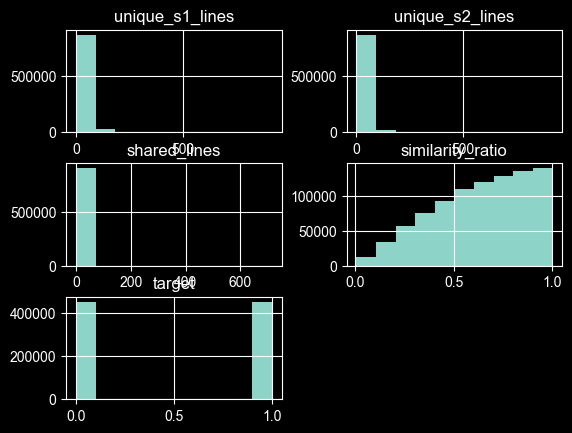

In [5]:
print("Summary of dataset ")
display(train_df.describe(include='all'))
print("Graphical Representation of data")
train_df.hist()
sns.set(style="darkgrid")
plt.show()


In [6]:
X = train_df.drop('target',axis=1)

y_name = 'target'
y = train_df[y_name]

In [7]:
seed = 42 

test_size = 0.20 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=test_size, random_state=seed)

scoring = 'accuracy'

In [9]:
#Chose the algorithms
models = []

#Based on Decision Tree
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

# Based on SVMs
models.append(('Linear SVC', LinearSVC()))

# Based on Neural Network 
models.append(("Multi-Layer Perceptron", MLPClassifier()))

k4folds = 5
results = []
names = []

for name, model in tqdm(models):   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(
        n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (
        name, scoring, cv_results.mean(), cv_results.std())
    print(msg)

print('done \n')


  0%|          | 0/4 [00:00<?, ?it/s]

 ++ NOW WORKING ON ALGORITHM Decision Tree ++
Splitting data into 5 folds
Training model on each split


 25%|██▌       | 1/4 [00:11<00:35, 11.93s/it]

algorithm Decision Tree accuracy results: mean = 0.739539 (std = 0.000742)
 ++ NOW WORKING ON ALGORITHM Random Forest ++
Splitting data into 5 folds
Training model on each split


 50%|█████     | 2/4 [07:34<08:51, 265.52s/it]

algorithm Random Forest accuracy results: mean = 0.755611 (std = 0.000729)
 ++ NOW WORKING ON ALGORITHM Linear SVC ++
Splitting data into 5 folds
Training model on each split


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 75%|███████▌  | 3/4 [13:13<04:58, 298.81s/it]

algorithm Linear SVC accuracy results: mean = 0.502110 (std = 0.002168)
 ++ NOW WORKING ON ALGORITHM Multi-Layer Perceptron ++
Splitting data into 5 folds
Training model on each split


100%|██████████| 4/4 [43:40<00:00, 655.12s/it]

algorithm Multi-Layer Perceptron accuracy results: mean = 0.563272 (std = 0.001013)
done 



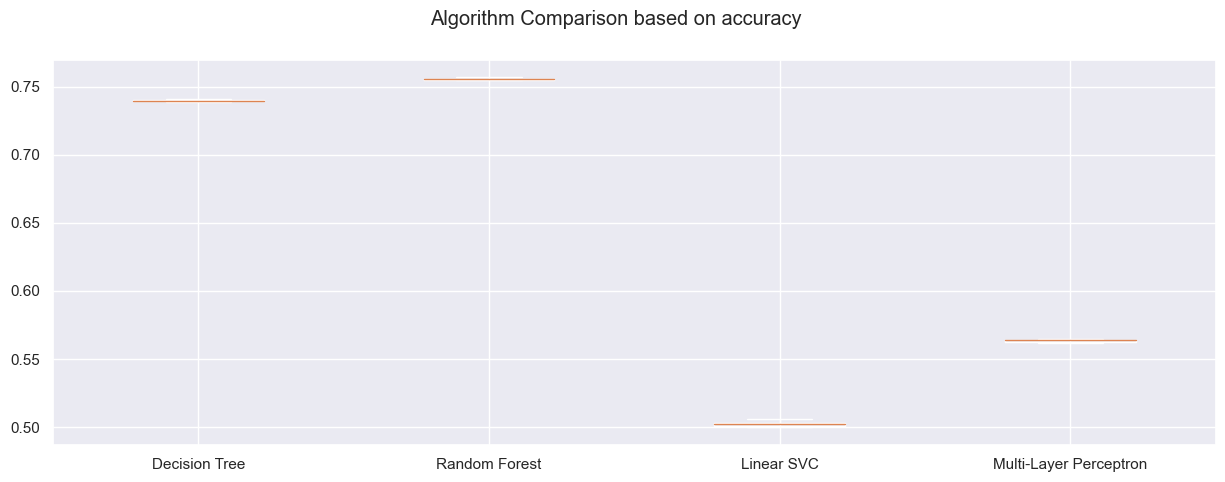

In [35]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# # Compare Algorithms
# fig = plt.figure(figsize=(15, 5))
# fig.suptitle('Algorithm Comparison based on %s' % scoring)
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()


In [ ]:
# Tuning Random Forest Classifier 

hyperparameters_RF = {'max_depth': np.arange(
    27, 50), 'n_estimators': np.arange(30, 50, 5)}
clf = GridSearchCV(RandomForestClassifier(),
                   hyperparameters_RF, cv=5, scoring=scoring, verbose=2)
clf.fit(X_train, y_train)
print("Best Hyperparameters for Random Forest")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_

training_accuracy = []
test_accuracy = []

max_dep = range(25, 50)
neighbors_setting = range(30, 50)

for md in tqdm(max_dep):
    tree = RandomForestClassifier(max_depth=md, random_state=seed)
    tree.fit(X_train, y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))

sns.set(style="darkgrid")
sns.lineplot(x=max_dep, y=training_accuracy)
sns.lineplot(x=max_dep, y=test_accuracy)
# plt.plot(max_dep, training_accuracy, label='Accuracy of the training set')
# plt.plot(max_dep, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.show()


Fitting 5 folds for each of 92 candidates, totalling 460 fits
[CV] END ......................max_depth=27, n_estimators=30; total time=  26.1s
[CV] END ......................max_depth=27, n_estimators=30; total time=  24.3s
[CV] END ......................max_depth=27, n_estimators=30; total time=  24.9s
[CV] END ......................max_depth=27, n_estimators=30; total time=  24.8s


KeyboardInterrupt: 

In [ ]:
# Tuning Decision Tree Classifier

hyperparameters_DT = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
}
clf_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                   hyperparameters_DT, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
clf_dt.fit(X_train, y_train)
print("Best Hyperparameters for Random Forest")
print(clf_dt.best_params_)
tuned_model_DT = clf_dt.best_estimator_

training_accuracy_dt = []
test_accuracy_dt = []

max_depth = range(1,20)
min_samples = range(1,20)
min_sample_leaf = range(1,20)


for ms in tqdm(max_depth): # Switch max_depth with min_samples and min_sample_leaf
    tree_dt = DecisionTreeClassifier(max_depth=ms, random_state=seed)
    tree_dt.fit(X_train, y_train)
    training_accuracy_dt.append(tree_dt.score(X_train, y_train))
    test_accuracy_dt.append(tree_dt.score(X_test, y_test))

sns.set(style="darkgrid")
sns.lineplot(x=max_depth, y=training_accuracy_dt)
sns.lineplot(x=max_depth, y=test_accuracy_dt)
# plt.plot(max_dep, training_accuracy, label='Accuracy of the training set')
# plt.plot(max_dep, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.show()


In [ ]:
#Tuning linearSVC

print("Tuning Linear SVC Model!")
hyperparameters_lSVC = {'C': [0.1, 1, 10],
                        'tol': [0.1, 0.01, 0.001]}
clf = GridSearchCV(LinearSVC(),
                   hyperparameters_lSVC, cv=5, scoring=scoring, verbose=2)
clf.fit(X_train, y_train)
print("Best Hyperparameters for linear SVC")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_


In [ ]:
# # For MLP Classifier 
# from sklearn.neural_network import MLPClassifier
# # 1st combination of architecture choices
# mlp_1 = MLPClassifier(hidden_layer_sizes=(10, 10, 10),
#                       activation='relu')
# scores_1 = cross_val_score(mlp_1, X, y, cv=5)
# scores_1a = accuracy_score(mlp_1)

# # 2nd combination of architecture choices
# mlp_2 = MLPClassifier(hidden_layer_sizes=(20, 20,),
#                       activation='logistic')
# scores_2 = cross_val_score(mlp_2, X, y, cv=5)

# # 3rd combination of architecture choices
# mlp_3 = MLPClassifier(hidden_layer_sizes=(30,),
#                       activation='tanh')
# scores_3 = cross_val_score(mlp_3, X, y, cv=5)


In [ ]:
# print("Cross Validation score for Model 1: ", scores_1.mean())
# print("Cross Validation score for Model 2: ", scores_2.mean())
# print("Cross Validation score for Model 3: ", scores_3.mean())
